## Sentimental Analysis on COVID-19

 We are going to use a Dataset consisting of data related to the tweets from 24th of july 2020 to 30th of august 2020, with covid19 hashtags. We are going to apply sentimental analysis on the tweets to see peoples reactions to the pandemic during the mentioned period. We are going to label the tweets as Positive, Negative and Neutral. After that we are going to visualize the result to see the people reactions on twitter.

Importing libraries

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siphe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\siphe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#imprting the data

tweets = pd.read_csv("https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv")

In [3]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


## Preprocessing and Data Cleaning

In [4]:
tweets.shape

(179108, 13)

In [5]:
tweets.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

Let's select the columns needed for our project


In [6]:
needed_columns = ["user_name", "date", "text"]
tweet_df = tweets[needed_columns]
tweet_df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


Change the data type of some columns

In [7]:
#assigning a unique numerical value to each username 

tweet_df.user_name = tweet_df.user_name.astype('category')
tweet_df.user_name = tweet_df.user_name.cat.codes

#convert date column to datetime and then only get the date 

tweet_df.date = pd.to_datetime(tweet_df.date).dt.date

tweet_df.head()

C:\Users\siphe\AppData\Local\Temp\ipykernel_1104\1998365055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df.user_name = tweet_df.user_name.astype('category')
C:\Users\siphe\AppData\Local\Temp\ipykernel_1104\1998365055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df.user_name = tweet_df.user_name.cat.codes
C:\Users\siphe\AppData\Local\Temp\ipykernel_1104\1998365055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


In [8]:
tweet_df.dtypes

user_name     int32
date         object
text         object
dtype: object

Picking out the tweet texts

In [9]:
texts = tweet_df["text"]
texts

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

Remove URLs from tweets

In [10]:
remove_url = lambda x: re.sub(r'https\S+', '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104           2020! The year of insanity! Lol! #COVID19 
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

converting all the tweets to lowercase


In [11]:
to_lower = lambda x: x.lower()
texts_lr_lc = texts_lr.apply(to_lower)
texts_lr_lc


0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104           2020! the year of insanity! lol! #covid19 
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

Removing Punctuation

In [12]:
remove_puncs = lambda x : x.translate(str.maketrans('', '', string.punctuation))
texts_np = texts_lr_lc.apply(remove_puncs)

Removing stopwords

In [13]:
more_words =['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('English'))
stop_words.update(more_words)

remove_words = lambda x : " ".join([word for word in x.split() if word not in stop_words])
texts_np_ns = texts_np.apply(remove_words)
texts_np_ns

0         smelled scent hand sanitizers today someone pa...
1         hey yankees yankeespr mlb wouldnt made sense p...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104                               2020 year insanity lol
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop see stop sabcnews izindabanews24 dailysun...
Name: text, Length: 179108, dtype: object

Let's create a biglist of words out of all the tweets


In [14]:
words_list = [word for line in texts_np_ns for word in line.split()]
words_list[:5]

['smelled', 'scent', 'hand', 'sanitizers', 'today']

In [15]:
#lest find the most common words
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ["word","frq"]




px.bar(words_df, x='word', y = 'frq', title = 'Most Common Words')

In [16]:
#Put the cleaned texts in the main dataframe

tweet_df.text = texts_np_ns
tweet_df.head()

C:\Users\siphe\AppData\Local\Temp\ipykernel_1104\494020023.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers today someone pa...
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...


## Sentimental Analysis

Getting the polarity for each tweet

In [17]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = tweet_df.text.apply(ps)


sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.00,0.758,0.242,0.4939
1,0.11,0.709,0.181,0.2263
2,0.00,0.832,0.168,0.2057
3,0.00,0.563,0.437,0.7351
4,0.00,0.796,0.204,0.3182


Labeling the scores based on the compound polarity value

In [18]:
labelize = lambda x: 'neutral' if x==0 else('positive' if x >0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.00,0.758,0.242,0.4939,positive
1,0.11,0.709,0.181,0.2263,positive
2,0.00,0.832,0.168,0.2057,positive
3,0.00,0.563,0.437,0.7351,positive
4,0.00,0.796,0.204,0.3182,positive


Let's join the two dataframes


In [20]:
data = tweet_df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hand sanitizers today someone pa...,positive
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positive
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positive
3,84572,2020-07-25,brookbanktv one gift give appreciation simple ...,positive
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...,positive


Plotting the sentiment ascore counts

In [22]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,positive,70048
1,neutral,62520
2,negative,46540


<AxesSubplot:xlabel='index', ylabel='label'>

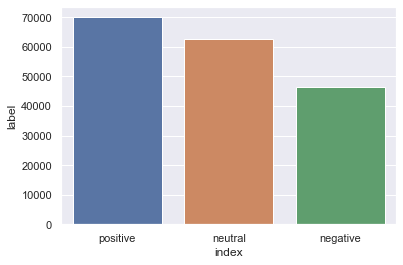

In [25]:
sns.barplot(x = 'index', y='label', data = counts_df)

In [31]:
data_agg = data[["user_name","date","label"]].groupby(["date","label"]).count().reset_index()
data_agg.columns = ['date','label','counts']

In [32]:
px.line(data_agg, x= 'date', y='counts',color = 'label', title= 'Daily Tweets Sentimental Analysis')